# Playground 

A place to quickly test and experiment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.special as sp

from matplotlib import rc
rc('text', usetex=True)

### Bessel Functions

First kind of real order and complex argument.

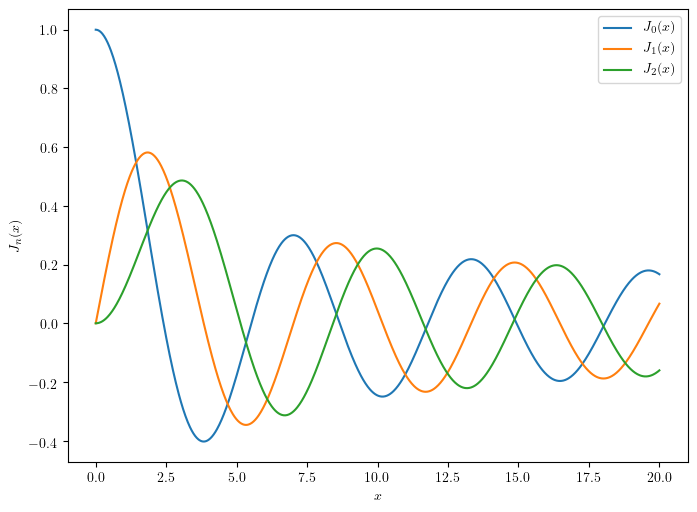

In [2]:
x = np.linspace(0,20,1000)

fig = plt.figure(figsize=(8,6), dpi= 100)

for a in range(0,3):
    plt.plot(x, sp.jv(a,x), label=f'$J_{a}(x)$')
    
plt.xlabel('$x$')
plt.ylabel('$J_n(x)$')
plt.legend()

plt.show()

Second kind of real order and complex argument.

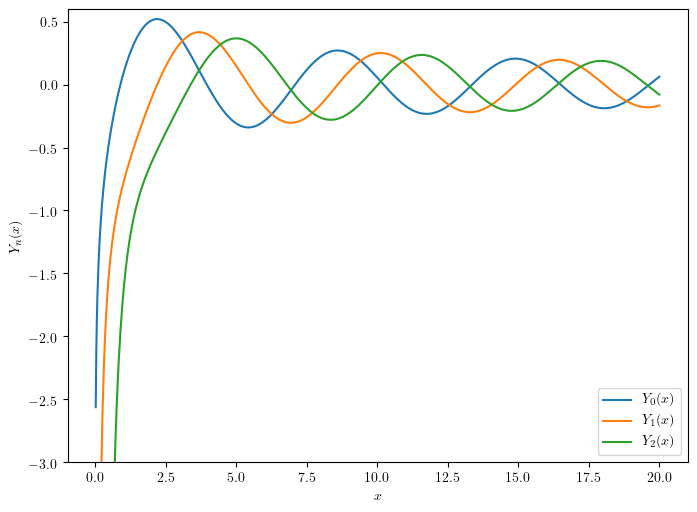

In [3]:
fig = plt.figure(figsize=(8,6), dpi= 100)

for a in range(0,3):
    plt.plot(x, sp.yn(a,x), label=f'$Y_{a}(x)$')

plt.xlabel('$x$')
plt.ylabel('$Y_n(x)$')

plt.ylim((-3, 0.6))

plt.legend()

plt.show()